# Deep_learning for R4

In [33]:
from utils import *
import time
import talib as ta
import numpy as np
import pandas as pd
from talib import MA_Type
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.preprocessing import MinMaxScaler
from stock_reader import reader
import sklearn.preprocessing
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import warnings

In [34]:
warnings.filterwarnings("ignore")

In [35]:
def parser(x):
    return datetime.datetime.strptime(x,'%m/%d/%Y')

Enter Code or Symbol : 005930
Enter start date(YYYY-MM--DD) : 20190422
Enter end date(YYYY-MM--DD) : 20200422

     Symbol  Name          Sector
947  005930  삼성전자  통신 및 방송 장비 제조업

             open   high    low  close    volume    change
Date                                                      
2019-04-22  45400  45900  45100  45350   6006957  0.001104
2019-04-23  45050  45500  45000  45200   6920566 -0.003308
2019-04-24  45400  45650  44150  44750  13299267 -0.009956
2019-04-25  44250  45000  44100  44650  10868965 -0.002235
2019-04-26  44200  45000  43800  44850   9739982  0.004479
...           ...    ...    ...    ...       ...       ...
2020-04-16  49350  49350  48550  49000  23349760  0.000000
2020-04-17  50800  52000  50300  51400  32041675  0.048980
2020-04-20  51400  51400  50000  50100  21866354 -0.025292
2020-04-21  49400  49700  48700  49250  27407543 -0.016966
2020-04-22  48700  50000  48350  49850  18613864  0.012183

[249 rows x 6 columns]


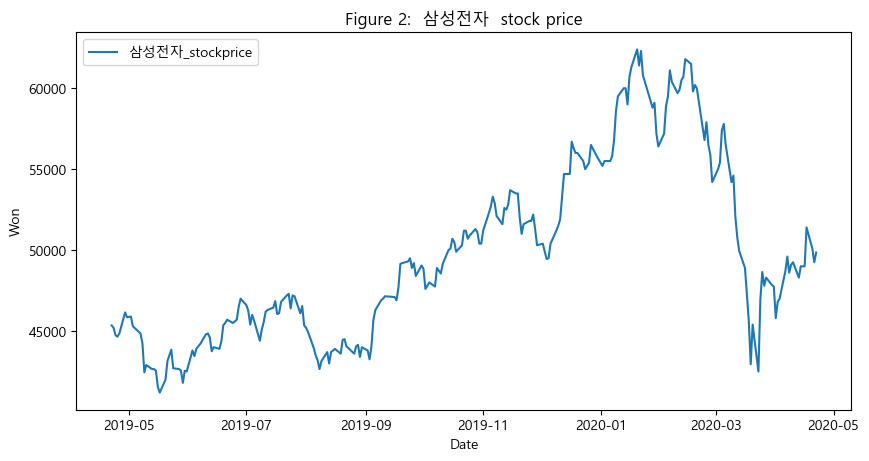


There are 249 number of days in the dataset.



In [36]:
## load data 삼전 : 005930
dataset_ex_df = reader()

In [58]:
def get_technical_indicators(dataset):
    
#    #이동평균선
    dataset['ma3'] = ta.MA(dataset_ex_df['close'], timeperiod = 3)
    dataset['ma5'] = ta.MA(dataset_ex_df['close'], timeperiod = 5)
    dataset['ma10'] = ta.MA(dataset_ex_df['close'], timeperiod = 10)
    dataset['ma20'] = ta.MA(dataset_ex_df['close'], timeperiod = 20)
    dataset['ma60'] = ta.MA(dataset_ex_df['close'], timeperiod = 60)


#     #지수이평선
    dataset['ema5'] = ta.EMA(dataset_ex_df['close'],timeperiod = 5)
    dataset['ema10'] = ta.EMA(dataset_ex_df['close'],timeperiod = 10)
    dataset['12ema'] = dataset['close'].ewm(span=12).mean()
    dataset['ema20'] = ta.EMA(dataset_ex_df['close'],timeperiod = 20)
    dataset['26ema'] = dataset['close'].ewm(span=26).mean()
    dataset['ema60'] = ta.EMA(dataset_ex_df['close'],timeperiod = 60)

    
#     #거래량 이평선
    dataset['vma5'] = ta.MA(dataset_ex_df['volume'], timeperiod=5, matype=0)
    dataset['vma10'] = ta.MA(dataset_ex_df['volume'], timeperiod=10, matype=0)
    dataset['vma20'] = ta.MA(dataset_ex_df['volume'], timeperiod=20, matype=0)
    dataset['vma60'] = ta.MA(dataset_ex_df['volume'], timeperiod=60, matype=0)

    
#     #이격도
    dataset['dis5'] = ((dataset_ex_df['close'] - (dataset_ex_df['close'].rolling(window=5).mean()))/(dataset_ex_df['close'].rolling(window=5).mean()))*100
    dataset['dis10'] = ((dataset_ex_df['close'] - (dataset_ex_df['close'].rolling(window=10).mean()))/(dataset_ex_df['close'].rolling(window=10).mean()))*100
    dataset['dis20'] = ((dataset_ex_df['close'] - (dataset_ex_df['close'].rolling(window=20).mean()))/(dataset_ex_df['close'].rolling(window=20).mean()))*100


#     #볼린져 벤드
    dataset['20sd'] = dataset['close'].rolling(window = 20).std()
    dataset['upper'] = (dataset['close'].rolling(window = 20).mean()) + (dataset['20sd']*2)
    dataset['lower'] = (dataset['close'].rolling(window = 20).mean()) - (dataset['20sd']*2)


#     #ATR 
    dataset['atr5'] = ta.ATR(dataset_ex_df['high'], dataset_ex_df['low'], dataset_ex_df['close'], timeperiod=5)
    dataset['atr10'] = ta.ATR(dataset_ex_df['high'], dataset_ex_df['low'], dataset_ex_df['close'], timeperiod=10)
    dataset['atr20'] = ta.ATR(dataset_ex_df['high'], dataset_ex_df['low'], dataset_ex_df['close'], timeperiod=20) 
    dataset['atr60'] = ta.ATR(dataset_ex_df['high'], dataset_ex_df['low'], dataset_ex_df['close'], timeperiod=60) 
    

#     #MACD 
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])

#     #Momentum    
    dataset['momentum'] = (dataset['close']/100)-1
    
    
    
    return dataset

In [59]:
dataset_TI_df = get_technical_indicators(dataset_ex_df).reset_index()


In [ ]:
# reset_index 명령으로 인덱스를 보통의 자료열로 바꿀 수도 있다. 이 때 인덱스 열은 자료열의 가장 선두로 삽입된다. 데이터프레임의 인덱스는 정수로 된 디폴트 인덱스로 바뀐다.

In [60]:
dataset_TI_df.tail()

,Date,open,high,low,close,volume,change,ma3,ma5,ma10,...,dis20,20sd,upper,lower,atr5,atr10,atr20,atr60,MACD,momentum
244,2020-04-16,49350,49350,48550,49000,23349760,0.000000,48766.666667,48930.0,48535.0,...,3.233962,1974.581901,51414.163802,43515.836198,1138.436839,1541.156348,1776.721047,1588.304714,-785.821219,489.0
245,2020-04-17,50800,52000,50300,51400,32041675,0.048980,49800.000000,49390.0,48995.0,...,7.334900,1858.258593,51604.017187,44170.982813,1510.749471,1687.040713,1837.884994,1611.832969,-500.004127,513.0
246,2020-04-20,51400,51400,50000,50100,21866354,-0.025292,50166.666667,49560.0,49305.0,...,4.109304,1823.997562,51770.495123,44474.504877,1488.599577,1658.336642,1815.990745,1608.302419,-374.079007,500.0
247,2020-04-21,49400,49700,48700,49250,27407543,-0.016966,50250.000000,49750.0,49360.0,...,1.630210,1268.919972,50997.839944,45922.160056,1470.879661,1632.502978,1795.191208,1604.830712,-338.962983,491.5
248,2020-04-22,48700,50000,48350,49850,18613864,0.012183,49733.333333,49920.0,49385.0,...,2.561465,1252.880891,51110.761781,46099.238219,1506.703729,1634.252680,1787.931647,1605.583534,-259.724356,497.5


In [40]:
def plot_technical_indicators(dataset, last_days): #기술적지표 그래프
    plt.figure(figsize=(15, 10), dpi=150)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)
    
    # Plot first subplot
    plt.subplot(311)
    plt.plot(dataset['ma5'],label='MA 5', color='gold',linestyle='--')
    plt.plot(dataset['close'],label='Closing Price', color='b')
    plt.plot(dataset['ma20'],label='MA 20', color='r',linestyle='--')
    plt.plot(dataset['upper'],label='Upper Band', color='c')
    plt.plot(dataset['lower'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower'], dataset['upper'], alpha=0.35)
    plt.title('Technical indicators - last {} days.'.format(last_days))
    plt.ylabel('원or달러')
    plt.xlabel('시간')
    plt.legend()

    # Plot second subplot
    plt.subplot(312)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
    plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.plot(dataset['momentum'],label='Momentum', color='b',linestyle='-')
    plt.plot(dataset['20sd'],label='20일표준편차', color='black')
    plt.ylabel('macd')
    plt.xlabel('시간')
    plt.legend()

    
    plt.subplot(313)
    plt.title('이격도')
    plt.plot(dataset['dis5'],label='dis5', color='green')
    plt.plot(dataset['dis10'],label='dis10', color='b')
    plt.plot(dataset['dis20'],label='dis20', color='r')
    plt.ylabel('%')
    plt.xlabel('시간')
    plt.legend()
    
    plt.show()

In [9]:
# plot_technical_indicators(dataset_TI_df, 400)

In [10]:
# dataset_TI_df = get_fourier(dataset_ex_df.reset_index())

In [29]:
dataset_TI_df

,Date,open,high,low,close,volume,change,ma3,ma5,ma10,...,dis20,20sd,upper,lower,atr5,atr10,atr20,atr60,MACD,momentum
0,2020-01-23,61800,61800,60700,60800,14916555,-0.024077,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,607.0
1,2020-01-28,59400,59400,58300,58800,23664541,-0.032895,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-44.871795,587.0
2,2020-01-29,59100,59700,58800,59100,16446102,0.005102,59566.666667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-47.872591,590.0
3,2020-01-30,58800,58800,56800,57200,20821939,-0.032149,58366.666667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-116.662953,571.0
4,2020-01-31,57800,58400,56400,56400,19749457,-0.013986,57566.666667,58460.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-183.420399,563.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2020-04-16,49350,49350,48550,49000,23349760,0.000000,48766.666667,48930.0,48535.0,...,3.233962,1974.581901,51414.163802,43515.836198,1138.438053,1542.428526,1797.002034,NaN,-687.316556,489.0
58,2020-04-17,50800,52000,50300,51400,32041675,0.048980,49800.000000,49390.0,48995.0,...,7.334900,1858.258593,51604.017187,44170.982813,1510.750442,1688.185673,1857.151932,NaN,-410.446714,513.0
59,2020-04-20,51400,51400,50000,50100,21866354,-0.025292,50166.666667,49560.0,49305.0,...,4.109304,1823.997562,51770.495123,44474.504877,1488.600354,1659.367106,1834.294336,NaN,-291.622248,500.0
60,2020-04-21,49400,49700,48700,49250,27407543,-0.016966,50250.000000,49750.0,49360.0,...,1.630210,1268.919972,50997.839944,45922.160056,1470.880283,1633.430395,1812.579619,1905.00,-262.439668,491.5


In [41]:
print('Total dataset has {} samples, and {} features.'.format(dataset_TI_df.shape[0], \
                                                              dataset_TI_df.shape[1]))

Total dataset has 249 samples, and 34 features.


In [42]:
# get a list of columns
cols = list(dataset_TI_df)
print(cols)

['Date', 'open', 'high', 'low', 'close', 'volume', 'change', 'ma3', 'ma5', 'ma10', 'ma20', 'ma60', 'ema5', 'ema10', '12ema', 'ema20', '26ema', 'ema60', 'vma5', 'vma10', 'vma20', 'vma60', 'dis5', 'dis10', 'dis20', '20sd', 'upper', 'lower', 'atr5', 'atr10', 'atr20', 'atr60', 'MACD', 'momentum']


In [43]:
# move the column to head of list using index, pop and insert
cols.insert(1, cols.pop(cols.index("close"))) # close를 두번째로 옮김
print(cols)

['Date', 'close', 'open', 'high', 'low', 'volume', 'change', 'ma3', 'ma5', 'ma10', 'ma20', 'ma60', 'ema5', 'ema10', '12ema', 'ema20', '26ema', 'ema60', 'vma5', 'vma10', 'vma20', 'vma60', 'dis5', 'dis10', 'dis20', '20sd', 'upper', 'lower', 'atr5', 'atr10', 'atr20', 'atr60', 'MACD', 'momentum']


In [44]:
# use ix to reorder
dt = dataset_TI_df.loc[dataset_TI_df.index[:], cols].dropna().reset_index(drop=True) 
# 인덱스열을 버림 
df1 = dt.set_index("Date") # data를 인덱스로 추가 
print(df1)
##최근에 ix 기능이 삭제되었음 # loc[df.index[:],cols] 로 대체 

            close   open   high    low    volume    change           ma3  \
Date                                                                       
2019-07-18  46100  46450  46450  45650   5143554  0.001086  46333.333333   
2019-07-19  46800  46650  46950  46600   8819393  0.015184  46316.666667   
2019-07-22  47200  46800  47300  46600   9009109  0.008547  46700.000000   
2019-07-23  47300  47350  47550  47050   9061381  0.002119  47100.000000   
2019-07-24  46400  47100  47150  46250   8756522 -0.019027  46966.666667   
...           ...    ...    ...    ...       ...       ...           ...   
2020-04-16  49000  49350  49350  48550  23349760  0.000000  48766.666667   
2020-04-17  51400  50800  52000  50300  32041675  0.048980  49800.000000   
2020-04-20  50100  51400  51400  50000  21866354 -0.025292  50166.666667   
2020-04-21  49250  49400  49700  48700  27407543 -0.016966  50250.000000   
2020-04-22  49850  48700  50000  48350  18613864  0.012183  49733.333333   

           

In [16]:
# df1.to_csv("data.csv")

In [57]:
data2 = []
def normalize_data(data):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    for i in range(0, len(data.columns)):
        data[data.columns[i]+"_norm"] = min_max_scaler.fit_transform(data[data.columns[i]].values.reshape(-1,1))
        data2.append(data[data.columns[i]+"_norm"])
    return data2
norm_data=pd.DataFrame(normalize_data(df1)).T
print(norm_data)
print(norm_data.T)

            close_norm  open_norm  high_norm  low_norm  volume_norm  \
Date                                                                  
2019-07-18    0.180905   0.202564   0.159383  0.172680     0.013387   
2019-07-19    0.216080   0.212821   0.185090  0.221649     0.080152   
2019-07-22    0.236181   0.220513   0.203085  0.221649     0.083598   
2019-07-23    0.241206   0.248718   0.215938  0.244845     0.084547   
2019-07-24    0.195980   0.235897   0.195373  0.203608     0.079010   
...                ...        ...        ...       ...          ...   
2020-04-16    0.326633   0.351282   0.308483  0.322165     0.344070   
2020-04-17    0.447236   0.425641   0.444730  0.412371     0.501942   
2020-04-20    0.381910   0.456410   0.413882  0.396907     0.317126   
2020-04-21    0.339196   0.353846   0.326478  0.329897     0.417772   
2020-04-22    0.369347   0.317949   0.341902  0.311856     0.258051   

            change_norm  ma3_norm  ma5_norm  ma10_norm  ma20_norm  ...  \
Da

In [18]:
# norm_data.to_csv("normalized.csv")

In [56]:
features = norm_data.reset_index(drop=True).rename(columns=lambda col: col.lower())
print(features)

     close_norm  open_norm  high_norm  low_norm  volume_norm  change_norm  \
0      0.180905   0.202564   0.159383  0.172680     0.013387     0.385345   
1      0.216080   0.212821   0.185090  0.221649     0.080152     0.468975   
2      0.236181   0.220513   0.203085  0.221649     0.083598     0.429604   
3      0.241206   0.248718   0.215938  0.244845     0.084547     0.391472   
4      0.195980   0.235897   0.195373  0.203608     0.079010     0.266037   
..          ...        ...        ...       ...          ...          ...   
184    0.326633   0.351282   0.308483  0.322165     0.344070     0.378904   
185    0.447236   0.425641   0.444730  0.412371     0.501942     0.669442   
186    0.381910   0.456410   0.413882  0.396907     0.317126     0.228878   
187    0.339196   0.353846   0.326478  0.329897     0.417772     0.278265   
188    0.369347   0.317949   0.341902  0.311856     0.258051     0.451170   

     ma3_norm  ma5_norm  ma10_norm  ma20_norm  ...  \
0    0.175131  0.1735

In [20]:
#로그리턴을 레이블데이터로
label = np.log(df1["close"] / df1["close"].shift(1)) 

In [21]:
# for i in range(len(logre)):
#     if logre[i] >= (logre.std() + logre.std()*0.008):
#         print(i,"high")
#     elif logre[i] <= (logre.std() + logre.std()*-0.007):
#         print(i, "down")
#     else:
#         print(i, "0")

In [22]:
label = label.reset_index(drop=True)

In [23]:
label = pd.DataFrame(label)

In [24]:
# 결측치 -1 로 처리
features.fillna(0, inplace = True)
label.fillna(0, inplace = True)

In [25]:
features

,close_norm,open_norm,high_norm,low_norm,volume_norm,change_norm,ma3_norm,ma5_norm,ma10_norm,ma20_norm,...,dis20_norm,20sd_norm,upper_norm,lower_norm,atr5_norm,atr10_norm,atr20_norm,atr60_norm,macd_norm,momentum_norm
0,0.056557,0.053808,0.056079,0.058433,0.005807,0.509879,0.051211,0.048576,0.041814,0.030672,...,0.651241,0.081439,0.025273,0.056659,0.059997,0.050130,0.052906,0.067375,0.431283,0.056557
1,0.067623,0.058775,0.060581,0.062992,0.007815,0.677863,0.054948,0.050761,0.043881,0.032569,...,0.762941,0.091760,0.028084,0.057439,0.085589,0.065491,0.060967,0.070260,0.443825,0.067623
2,0.072541,0.067053,0.066721,0.070037,0.005567,0.565411,0.060900,0.053870,0.046163,0.034421,...,0.800500,0.114431,0.032133,0.056691,0.087209,0.068270,0.062337,0.070428,0.458348,0.072541
3,0.077869,0.073262,0.070815,0.076668,0.003761,0.571200,0.068097,0.058240,0.049134,0.036318,...,0.842028,0.145366,0.037078,0.055002,0.074364,0.062486,0.058922,0.068593,0.474730,0.077869
4,0.077459,0.078642,0.072861,0.078326,0.004167,0.473622,0.071419,0.062862,0.051718,0.038193,...,0.815490,0.166923,0.041032,0.054412,0.066445,0.058662,0.056465,0.067122,0.485816,0.077459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418,0.967213,0.995861,0.979533,0.979279,0.234143,0.336527,0.988927,1.000000,1.000000,0.990062,...,0.700368,0.984590,1.000000,0.968177,0.761103,0.790274,0.785302,0.788387,0.971669,0.967213
2419,0.926230,0.946192,0.930413,0.929548,0.372070,0.283801,0.970934,0.989495,0.998493,0.994353,...,0.552654,0.936042,0.998916,0.978554,0.877441,0.866927,0.833767,0.811940,0.895323,0.926230
2420,0.932377,0.939983,0.936553,0.939909,0.258259,0.511003,0.948789,0.975628,0.996555,0.998532,...,0.560309,0.891681,0.998161,0.988310,0.781968,0.825460,0.816931,0.808418,0.836518,0.932377
2421,0.893443,0.933775,0.918133,0.898467,0.327251,0.288261,0.923875,0.957980,0.990526,0.999322,...,0.430736,0.879914,0.997669,0.990560,0.870565,0.884787,0.855955,0.828302,0.740197,0.893443


In [26]:
label.rename(columns = {'close' : 'log_close'}, inplace = True)

In [27]:
label

,log_close
0,-1.000000
1,0.032474
2,0.014101
3,0.015055
4,-0.001150
...,...
2418,-0.024372
2419,-0.033448
2420,0.005089
2421,-0.032677


In [28]:
features.to_csv("features.csv")
label.to_csv("label.csv")

In [29]:
df = pd.concat([features, label],axis=1)

In [30]:
df =pd.DataFrame(df)

In [37]:
df

,close_norm,open_norm,high_norm,low_norm,volume_norm,change_norm,ma3_norm,ma5_norm,ma10_norm,ma20_norm,...,20sd_norm,upper_norm,lower_norm,atr5_norm,atr10_norm,atr20_norm,atr60_norm,macd_norm,momentum_norm,log_close
0,0.056557,0.053808,0.056079,0.058433,0.005807,0.509879,0.051211,0.048576,0.041814,0.030672,...,0.081439,0.025273,0.056659,0.059997,0.050130,0.052906,0.067375,0.431283,0.056557,-1.000000
1,0.067623,0.058775,0.060581,0.062992,0.007815,0.677863,0.054948,0.050761,0.043881,0.032569,...,0.091760,0.028084,0.057439,0.085589,0.065491,0.060967,0.070260,0.443825,0.067623,0.032474
2,0.072541,0.067053,0.066721,0.070037,0.005567,0.565411,0.060900,0.053870,0.046163,0.034421,...,0.114431,0.032133,0.056691,0.087209,0.068270,0.062337,0.070428,0.458348,0.072541,0.014101
3,0.077869,0.073262,0.070815,0.076668,0.003761,0.571200,0.068097,0.058240,0.049134,0.036318,...,0.145366,0.037078,0.055002,0.074364,0.062486,0.058922,0.068593,0.474730,0.077869,0.015055
4,0.077459,0.078642,0.072861,0.078326,0.004167,0.473622,0.071419,0.062862,0.051718,0.038193,...,0.166923,0.041032,0.054412,0.066445,0.058662,0.056465,0.067122,0.485816,0.077459,-0.001150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418,0.967213,0.995861,0.979533,0.979279,0.234143,0.336527,0.988927,1.000000,1.000000,0.990062,...,0.984590,1.000000,0.968177,0.761103,0.790274,0.785302,0.788387,0.971669,0.967213,-0.024372
2419,0.926230,0.946192,0.930413,0.929548,0.372070,0.283801,0.970934,0.989495,0.998493,0.994353,...,0.936042,0.998916,0.978554,0.877441,0.866927,0.833767,0.811940,0.895323,0.926230,-0.033448
2420,0.932377,0.939983,0.936553,0.939909,0.258259,0.511003,0.948789,0.975628,0.996555,0.998532,...,0.891681,0.998161,0.988310,0.781968,0.825460,0.816931,0.808418,0.836518,0.932377,0.005089
2421,0.893443,0.933775,0.918133,0.898467,0.327251,0.288261,0.923875,0.957980,0.990526,0.999322,...,0.879914,0.997669,0.990560,0.870565,0.884787,0.855955,0.828302,0.740197,0.893443,-0.032677


In [33]:
df.to_csv("complete_file.csv")